In [1]:
import numpy as np
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
import tensorflow as tf
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2),padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2),padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2),padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.2),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(10,activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          2

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3707 - accuracy: 0.5042 - val_loss: 1.1688 - val_accuracy: 0.5944
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0345 - accuracy: 0.6305 - val_loss: 1.1280 - val_accuracy: 0.6051
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8982 - accuracy: 0.6821 - val_loss: 0.9686 - val_accuracy: 0.6538
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8257 - accuracy: 0.7075 - val_loss: 0.8677 - val_accuracy: 0.6933
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7737 - accuracy: 0.7276 - val_loss: 0.9712 - val_accuracy: 0.6746
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7242 - accuracy: 0.7422 - val_loss: 0.7856 - val_accuracy: 0.7296
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6931 - accuracy: 0.7565 - val_loss: 0.7305 - val_accuracy:

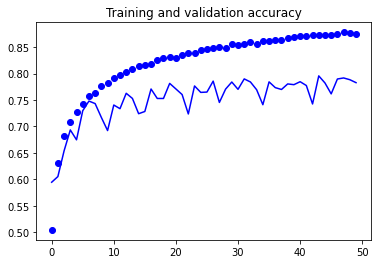

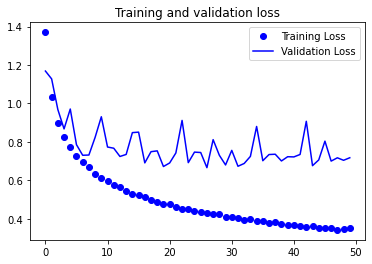

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()